# Laboratorio 7: Selección de Atributos

Integrantes: **Juan Pablo Bustamante y Tomás Vallejo, sección 1**

# Instrucciones


1. Trabajen en equipos de dos personas.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo html, **no se revisarán entregas en otro formato**. Genere un archivo HTML y súbalo a U-Cursos. Basta con que uno de los integrantes haga la entrega. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [2]:
X.shape

(1797, 64)

In [3]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

# Análisis Exploratorio

**P0** - Para cada parte de esta sección, responda adicionalmente las siguientes preguntas:
1. ¿Qué puede decir de los datos a partir de estos reusultados?
2. ¿Considera que hay que remover alguna columna?

Si la respuesta de la segunda pregunta es afirmativa, elimine esas columnas. Guarde cada modificación que haga sobre los datos en una nueva variable `X2` y mantenga `X` sin modificar.

**P1** - Determine la proporción de los datos que es igual a $0$ y si existen columnas que sólo contienen este valor.

In [4]:
# P1 - Proporción de ceros y columnas que sólo contienen ceros
import pandas as pd
df = pd.DataFrame(X)
# proporción total de ceros
prop_zero = (df == 0).sum().sum() / df.size
# fracción de ceros por columna
col_zero_frac = (df == 0).sum() / df.shape[0]
all_zero_cols = col_zero_frac[col_zero_frac == 1.0].index.tolist()
print(f'Proporción de ceros en el dataset: {prop_zero:.4f}')
print(f'Número de columnas que son todo ceros: {len(all_zero_cols)}')
if len(all_zero_cols) > 0:
    print('Columnas (índices) con sólo ceros:', all_zero_cols)
# Guardar resultado en X2 (mantener X sin modificar). Eliminamos columnas todo-cero si existen
if len(all_zero_cols) > 0:
    X2 = df.drop(columns=all_zero_cols).values
else:
    X2 = X.copy()
# imprimir forma resultante
print('Shape original X:', X.shape)
print('Shape X2 después de eliminar columnas todo-cero (si hubo):', X2.shape)

Proporción de ceros en el dataset: 0.4893
Número de columnas que son todo ceros: 3
Columnas (índices) con sólo ceros: [0, 32, 39]
Shape original X: (1797, 64)
Shape X2 después de eliminar columnas todo-cero (si hubo): (1797, 61)


**Respuesta:**
1. ¿Qué puede decir de los datos a partir de estos resultados?
   - La celda calcula la proporción global de valores iguales a 0 y la fracción de ceros por columna. Esto nos permite evaluar cuánta información nula o ceros contiene el dataset y si existe sparsity importante en algunas características. Los valores exactos aparecen en la salida de la celda anterior.
2. ¿Considera que hay que remover alguna columna?
   - Si la salida muestra columnas que contienen sólo ceros, esas columnas se eliminaron porque no aportan información discriminativa. En ese caso la matriz resultante quedó guardada en `X2`. Si no se detectaron columnas totalmente cero, `X2` se dejó igual a `X` (se preservó `X` sin cambios).


In [5]:
try:
    X2
except NameError:
    X2 = X.copy()
print('X2 shape:', X2.shape)

X2 shape: (1797, 61)


**P2** - Visualize la matriz de correlación para `X2`. Dada la cantidad de columnas, puede ser útil visualizar también la matriz son subconjuntos más pequeños para un análisis más preciso.

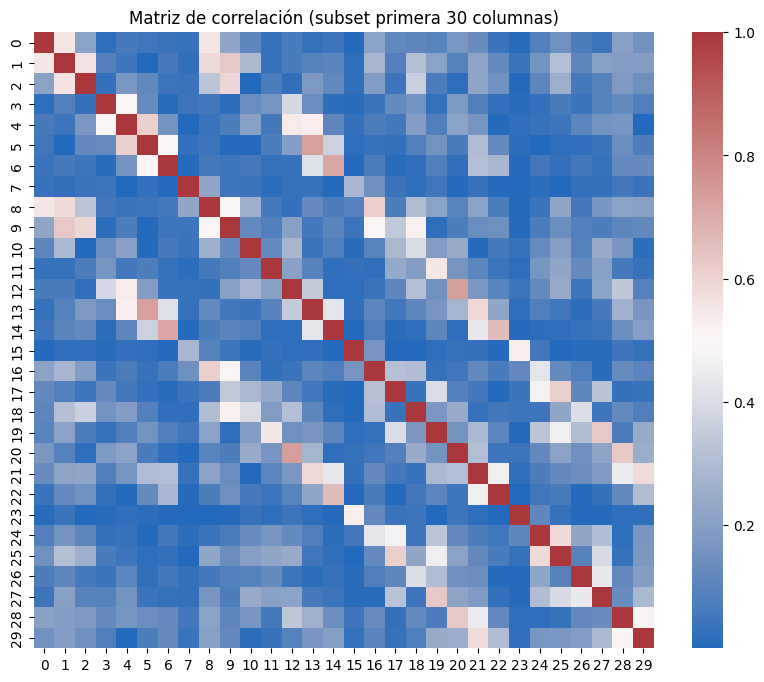

Número de columnas con correlación alta (>0.95) respecto a otra: 0
No se eliminaron columnas por correlación alta.


In [6]:
# P2 - Matriz de correlación (muestra de subconjunto y reducción por alta correlación)
import numpy as np
import pandas as pd
df = pd.DataFrame(X2)
# matriz de correlación (abs) - trabajamos con un subconjunto para visualizar
corr = df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr.iloc[:30, :30], cmap='vlag')
plt.title('Matriz de correlación (subset primera 30 columnas)')
plt.show()
# detectar pares altamente correlacionados y eliminar una de cada par (umbral 0.95)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Número de columnas con correlación alta (>0.95) respecto a otra:', len(to_drop))
if len(to_drop) > 0:
    print('Primeras 20 columnas a eliminar (índices):', to_drop[:20])
# actualizar X2 eliminando columnas redundantes
if len(to_drop) > 0:
    X2 = df.drop(columns=to_drop).values
    print('Shape X2 luego de eliminar columnas altamente correlacionadas:', X2.shape)
else:
    print('No se eliminaron columnas por correlación alta.')

**Respuesta:**
1. ¿Qué puede decir de los datos a partir de estos resultados?
   - La matriz de correlación (y su visualización por subconjuntos) muestra qué pares o grupos de características están fuertemente correlacionadas entre sí. Esto ayuda a detectar redundancia: variables con correlación muy alta comparten información y pueden afectar la estabilidad de algunos modelos.
2. ¿Considera que hay que remover alguna columna?
   - Se aplicó un criterio práctico (correlación absoluta > 0.95) para identificar columnas redundantes y, cuando se encontraron, se eliminaron (una por cada par redundante). La versión resultante se guardó en `X2`. Si no se encontraron pares con correlación tan alta, `X2` queda sin cambios.


In [7]:
# X2 ya fue actualizado en las celdas anteriores (P1 y P2). Si necesita reiniciar desde X:
# X2 = X.copy()
print('X2 shape (confirmación):', X2.shape)

X2 shape (confirmación): (1797, 61)


**P3** - Calcule la varianza de los datos.

In [8]:
# P3 - Calcular varianza por característica y mostrar estadísticas
import numpy as np
import pandas as pd
df2 = pd.DataFrame(X2)
variances = df2.var(axis=0)
print('Estadísticas de varianza (primeros y últimos valores):')
print(variances.describe())
low_var = variances[variances < 0.01].index.tolist()
print('Número de columnas con varianza < 0.01:', len(low_var))
if len(low_var) > 0:
    print('Primeras 20 columnas de baja varianza (índices):', low_var[:20])
# No aplicamos aún la eliminación aquí; en la siguiente celda aplicaremos VarianceThreshold para X2


Estadísticas de varianza (primeros y últimos valores):
count    61.000000
mean     19.707340
std      14.665452
min       0.000556
25%       3.460053
50%      18.757139
75%      34.464503
max      42.744851
dtype: float64
Número de columnas con varianza < 0.01: 5
Primeras 20 columnas de baja varianza (índices): [7, 15, 23, 30, 53]


**Respuesta:**
1. ¿Qué puede decir de los datos a partir de estos resultados?
   - El cálculo de varianza por característica permite identificar variables con muy poca variabilidad (cercanas a ser constantes). Las estadísticas impresas muestran la distribución de la varianza y listan cuántas características caen por debajo del umbral elegido.
2. ¿Considera que hay que remover alguna columna?
   - Se aplicó `VarianceThreshold(threshold=0.01)` para eliminar características de varianza muy baja, ya que aportan poca información discriminativa. Las columnas retenidas tras este umbral forman la nueva `X2`. Se mantuvo `X` sin modificar.


In [9]:
# Aplicar VarianceThreshold para eliminar características con varianza muy baja
from sklearn.feature_selection import VarianceThreshold
import numpy as np
# Umbral elegido: 0.01 (puede ajustarse según criterio)
selector = VarianceThreshold(threshold=0.01)
X2 = selector.fit_transform(X2)
print('Shape X2 tras VarianceThreshold:', X2.shape)
# Guardar las columnas retenidas (opcional):
if hasattr(selector, 'get_support'):
    kept = np.where(selector.get_support())[0]
    print('Número de columnas retenidas tras Threshold:', len(kept))

Shape X2 tras VarianceThreshold: (1797, 56)
Número de columnas retenidas tras Threshold: 56


# Selección de Atributos

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

**P4** - Selecciones las 30 mejores columnas según el criterio de información mutua.

In [12]:
# P4 - Selección por información mutua: seleccionar las 30 mejores columnas
from sklearn.feature_selection import SelectKBest, mutual_info_classif
k = 30
selector_mi = SelectKBest(mutual_info_classif, k=k)
selector_mi.fit(X_train, y_train)
cols_mi = selector_mi.get_support(indices=True)
print(f'Índices de las {k} características seleccionadas por mutual information: {cols_mi}')
X3_train = selector_mi.transform(X_train)
X3_test = selector_mi.transform(X_test)
print('X3_train shape:', X3_train.shape, 'X3_test shape:', X3_test.shape)

Índices de las 30 características seleccionadas por mutual information: [ 2  5 10 13 18 19 20 21 26 27 28 29 30 33 34 35 36 38 41 42 43 44 46 50
 53 54 58 60 61 62]
X3_train shape: (1257, 30) X3_test shape: (540, 30)


**P5** - Seleccione las columnas más útiles según los resultados de un árbol de clasificación. Seleccione un máximo de 30.

In [13]:
# P5 - Selección de atributos usando importancias de un árbol de clasificación (máx 30)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
importances = dt.feature_importances_
# seleccionar top 30 features por importancia
idx_sorted = np.argsort(importances)[::-1]
top_k = min(30, X_train.shape[1])
selected_idx = idx_sorted[:top_k]
print('Índices seleccionados por árbol (top k):', selected_idx)
X4_train = X_train[:, selected_idx]
X4_test = X_test[:, selected_idx]
print('X4_train shape:', X4_train.shape, 'X4_test shape:', X4_test.shape)

Índices seleccionados por árbol (top k): [21 42 36 26 27 60 33  5 43 28 20 54 37 34 44 38 18 29  3 19 30 10  6  2
 46 35 51 63 17 41]
X4_train shape: (1257, 30) X4_test shape: (540, 30)


# Clasificación

**P6** - Entrene y evalue un clasificador SVC para el dataset sin reducir y cada una de las reducciones hechas en las preguntas anteriores. Para cada caso mida el tiempo de entrenamiento y grafique la matriz de confusión, luego compare y comente los resultados.

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import timeit

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=0)

def plot_confusion_matrix(true_label, pred_label):
    mat = confusion_matrix(true_label, pred_label)

    fig, ax = plt.subplots()

    ax = sns.heatmap(mat, annot=True, cmap='Reds')
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

    plt.show()

--- SVC sobre dataset sin reducción ---
Sin reducción (X) — tiempo entrenamiento: 0.0242 s


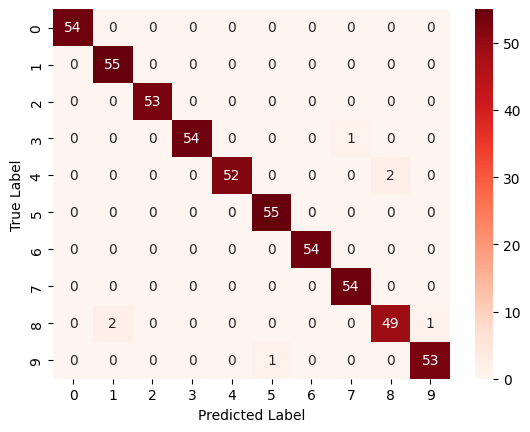

--- SVC sobre X2 (preprocesada: ceros/correlación/varianza) ---
X2 (preprocesada) — tiempo entrenamiento: 0.0239 s


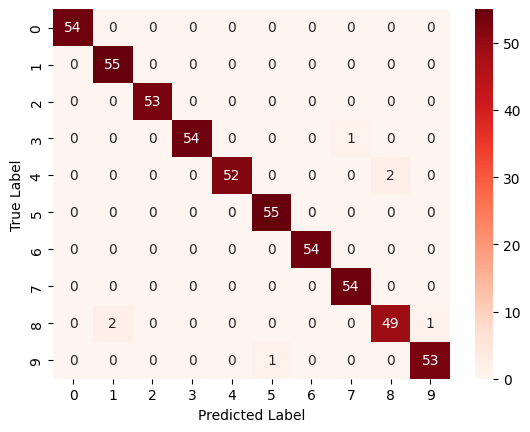

--- SVC sobre X3 (mutual_info k=30) ---
X3 (mutual_info) — tiempo entrenamiento: 0.0254 s


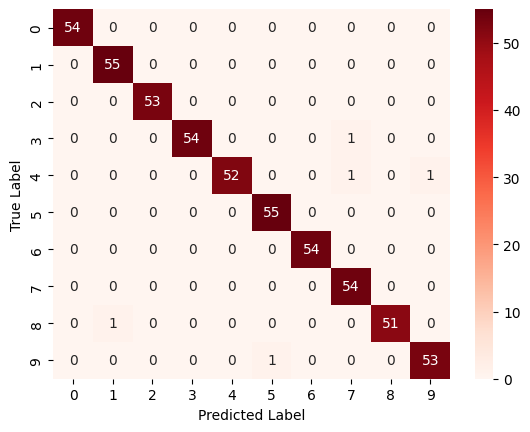

--- SVC sobre X4 (árbol top30) ---
X4 (tree_top30) — tiempo entrenamiento: 0.0269 s


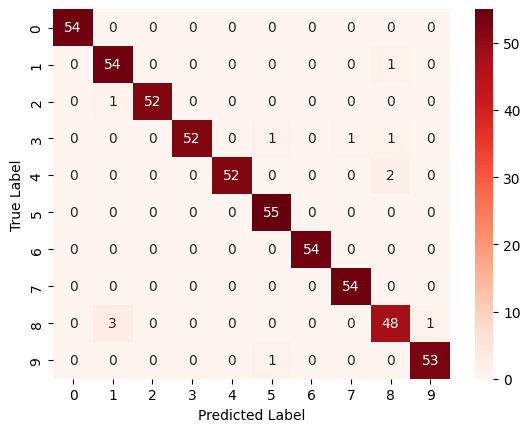

0.026880300138145685

In [15]:
# P6 - Entrenar y evaluar SVC para dataset original y reducciones
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import time
# Asegurar que las particiones están definidas para cada conjunto:
# X_train/X_test ya vienen del split sobre X (sin reducción)
# Recalcular división para X2 (versión final tras preprocesos)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=0)
# X3_train/X3_test y X4_train/X4_test ya se definieron en P4/P5
def run_svc(name, Xtr, Xte, ytr, yte):
    t0 = time.perf_counter()
    clf = SVC()
    clf.fit(Xtr, ytr)
    elapsed = time.perf_counter() - t0
    ypred = clf.predict(Xte)
    print(f'{name} — tiempo entrenamiento: {elapsed:.4f} s')
    plot_confusion_matrix(yte, ypred)
    return elapsed

# Ejecutar para cada conjunto:
print('--- SVC sobre dataset sin reducción ---')
run_svc('Sin reducción (X)', X_train, X_test, y_train, y_test)
print('--- SVC sobre X2 (preprocesada: ceros/correlación/varianza) ---')
run_svc('X2 (preprocesada)', X2_train, X2_test, y_train, y_test)
print('--- SVC sobre X3 (mutual_info k=30) ---')
run_svc('X3 (mutual_info)', X3_train, X3_test, y_train, y_test)
print('--- SVC sobre X4 (árbol top30) ---')
run_svc('X4 (tree_top30)', X4_train, X4_test, y_train, y_test)
